<a href="https://colab.research.google.com/github/alearauj/Scripts-Python/blob/main/EDA_An%C3%A1lise_Estat%C3%ADstica_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Este notebook foi criado com o objetivo de servir como um guia para realizar análises estatísticas descritivas de conjuntos de dados no formato CSV.

## **Preparação do ambiente**


**Liberação das bibliotecas**

In [76]:
# Acesse as bibliotecas necessarias

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from scipy.stats import zscore

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importação e leitura do arquivo csv**



In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Use o pandas para ler o arquivo CSV -- Lembre-se de atualizar o caminho.

# Especificar o caminho para o arquivo
df = pd.read_csv('/content/drive/My Drive/Dados para Portfolio/dados/dataset1.csv', sep=',', encoding='utf-8')

In [52]:
# Exiba as primeiras linhas do DataFrame para verificar se os dados foram lidos corretamente
print(df.head(3))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3


## **Conhecendo os dados**



**Checar tamanho do arquivo**

In [53]:
df.shape

(244, 7)

**Checar os dados**

In [54]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


**Encontrar valores nulos**

In [55]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Precisamos entender o que os valores nulos significam em cada uma das colunas para definirmos o que faremos com eles.


*  









**Encontrar valores duplicados**



In [56]:
df.duplicated().sum()

1

**Conhecer a tipagem dos dados**

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## **Análise Descritiva**

In [58]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


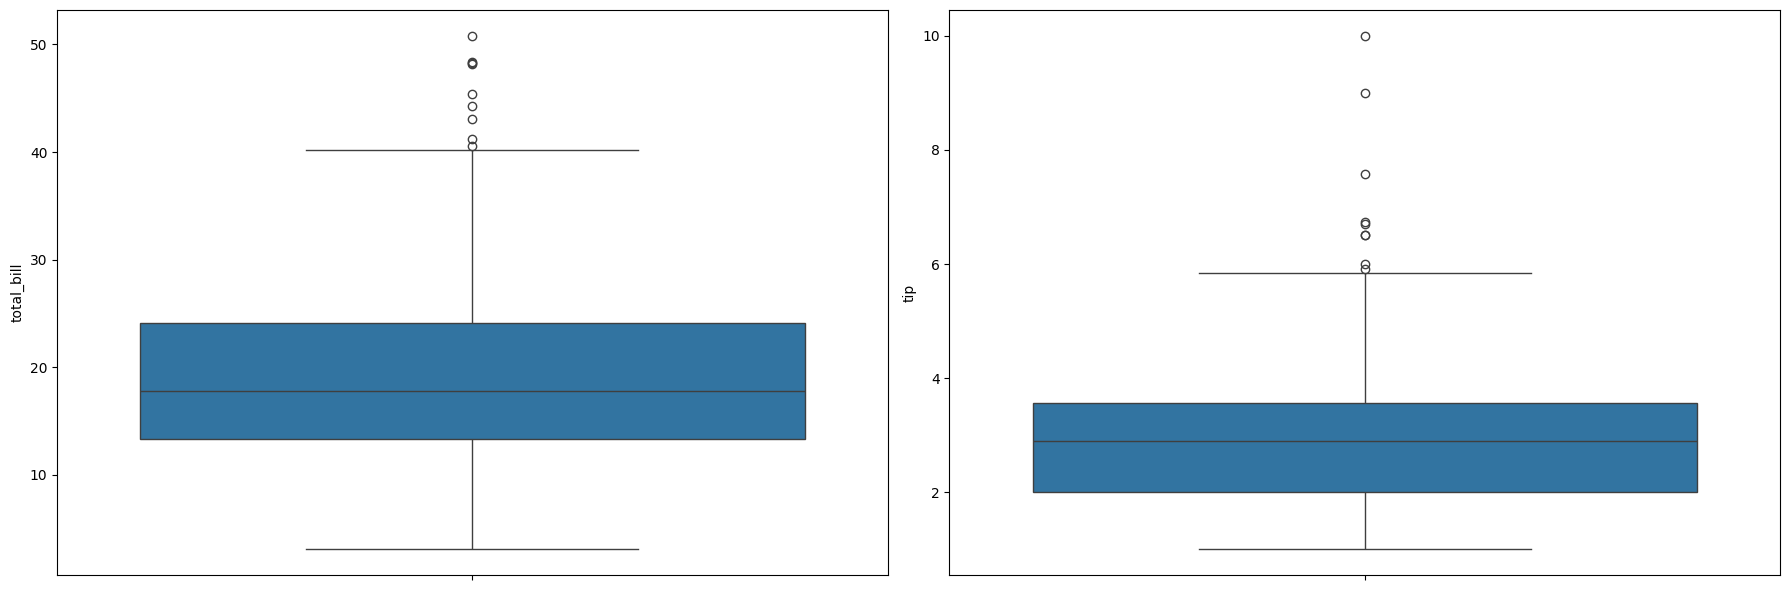

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.boxplot(data=df, y='total_bill', ax=axes[0])
sns.boxplot(data=df, y='tip', ax=axes[1])

plt.tight_layout()
plt.show()
#

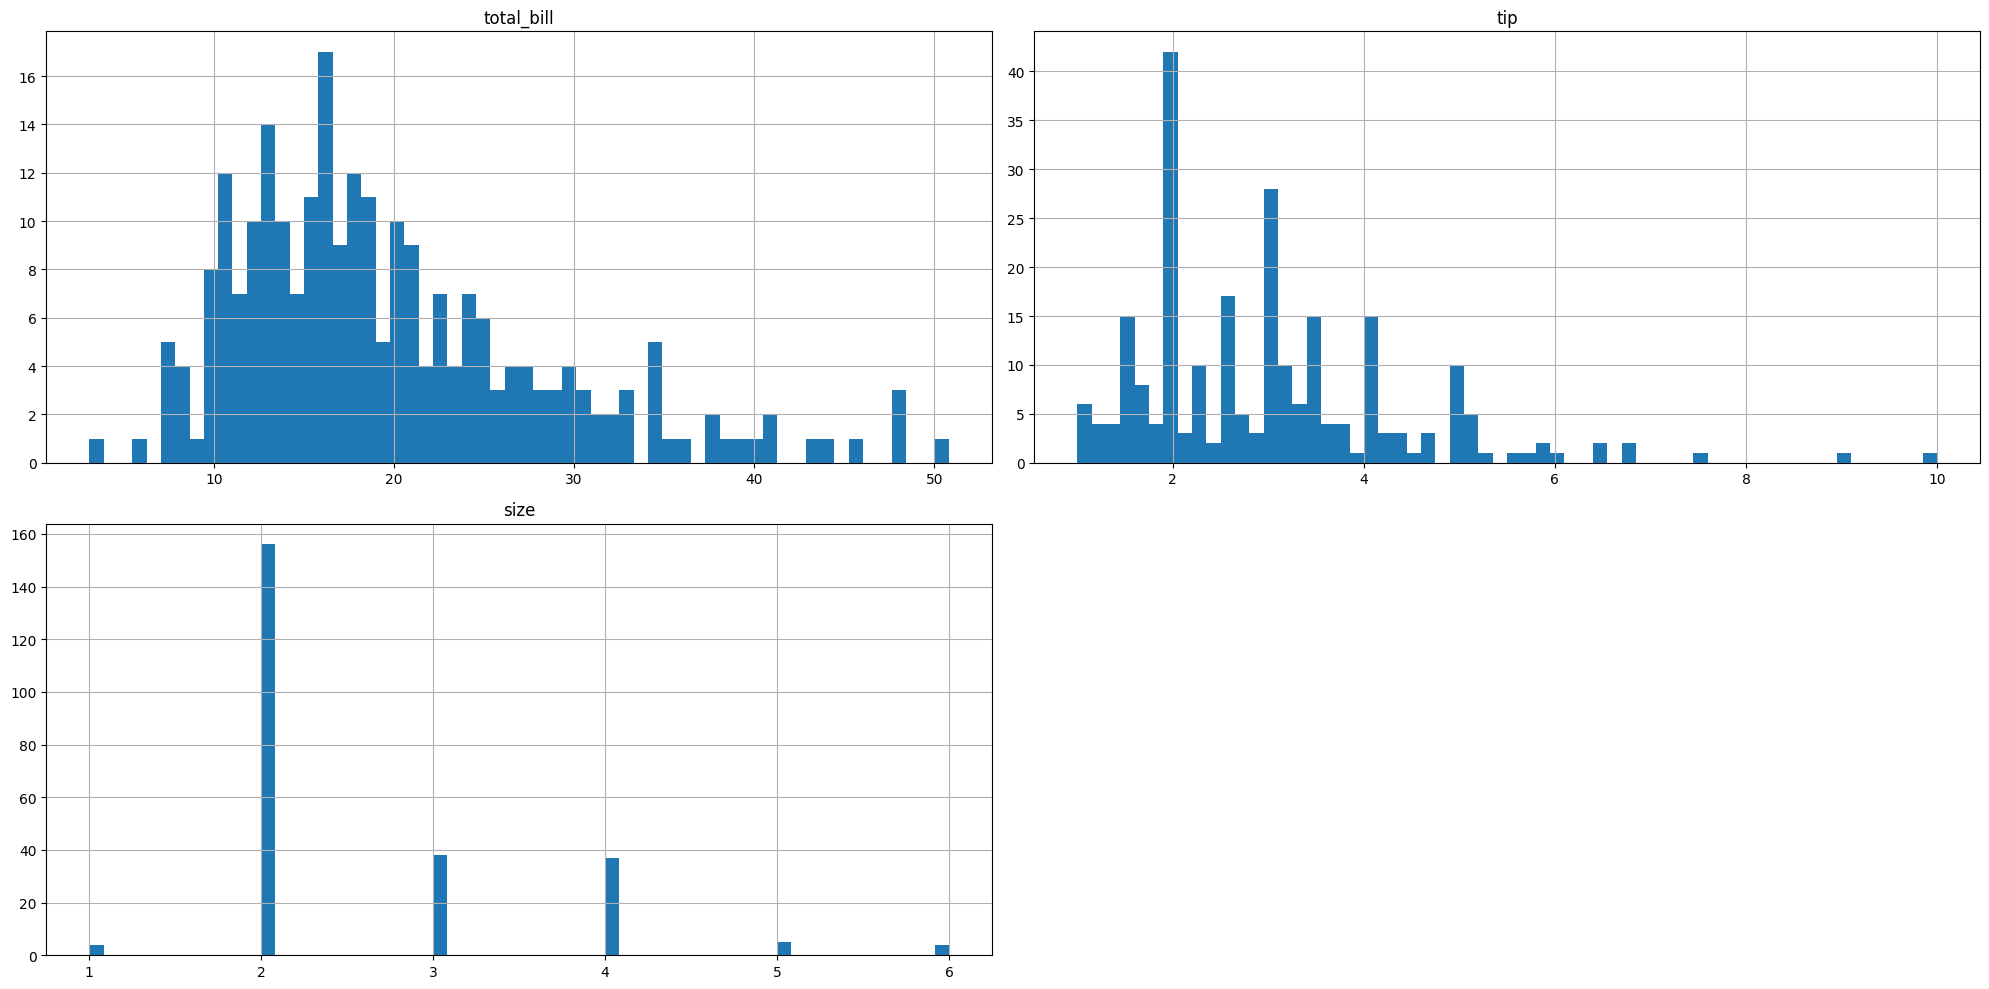

In [60]:
df.hist(bins=60, figsize=(20, 10))
plt.tight_layout()
plt.show()

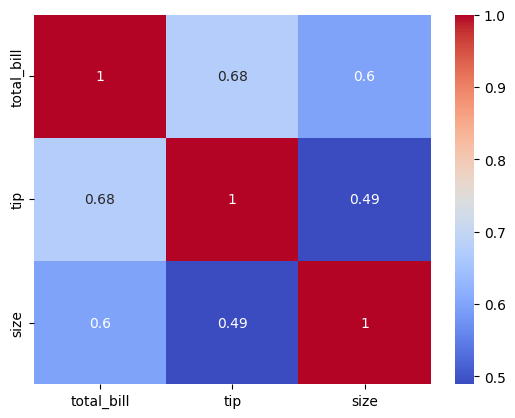

In [62]:
##Análise de Correlação

# Selecionar apenas colunas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
corr_matrix = numeric_df.corr()

# Visualizar a matriz de correlação
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

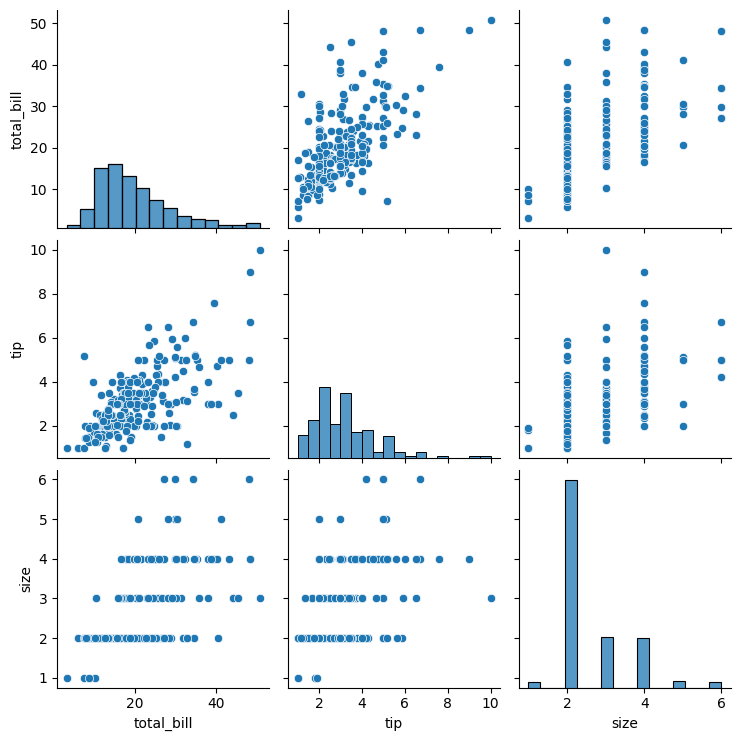

In [63]:
## Matriz de dispersão

sns.pairplot(df)
plt.show()


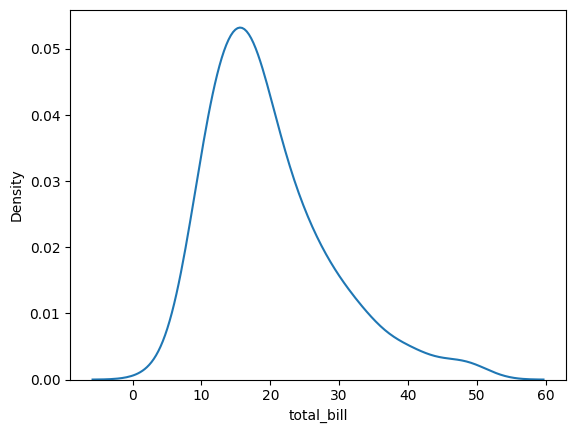

In [65]:
## Análise de Distribuição

sns.kdeplot(df['total_bill'])
plt.show()


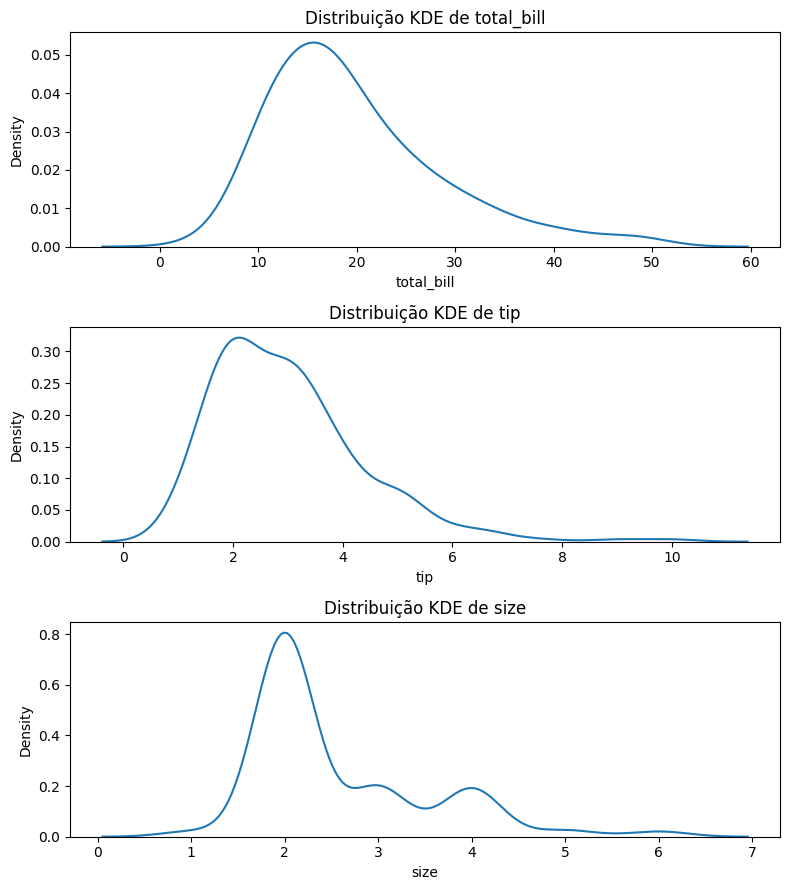

In [68]:
# Lista das colunas que você deseja plotar
columns_to_plot = ['total_bill', 'tip', 'size']

# Número de colunas que você deseja plotar
num_columns = len(columns_to_plot)

# Criar subplots
fig, axes = plt.subplots(num_columns, 1, figsize=(8, 3 * num_columns))

# Plotar gráficos KDE em subplots separados
for i, column in enumerate(columns_to_plot):
    sns.kdeplot(df[column], ax=axes[i])
    axes[i].set_title(f'Distribuição KDE de {column}')

# Ajustar layout
plt.tight_layout()
plt.show()

In [69]:
## Análise de tendências temporais

sns.lineplot(x='data', y='coluna_interesse', data=df)
plt.show()


ValueError: Could not interpret value `data` for `x`. An entry with this name does not appear in `data`.

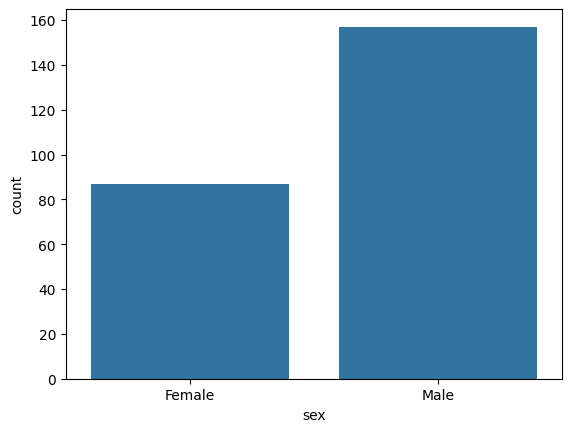

In [72]:
# Análise de Frequência

sns.countplot(x='sex', data=df)
plt.show()


In [74]:
# Estatísticas Descritivas Adicionais
print("Skewness: ", df['total_bill'].skew())
print("Kurtosis: ", df['total_bill'].kurtosis())

Skewness:  1.1332130376158205
Kurtosis:  1.2184840156638854


In [77]:
# Análise de Outliers
df['zscore'] = zscore(df['total_bill'])
outliers = df[df['zscore'].abs() > 3]
print(outliers)

     total_bill    tip   sex smoker  day    time  size    zscore
59        48.27   6.73  Male     No  Sat  Dinner     4  3.206166
156       48.17   5.00  Male     No  Sun  Dinner     6  3.194910
170       50.81  10.00  Male    Yes  Sat  Dinner     3  3.492068
212       48.33   9.00  Male     No  Sat  Dinner     4  3.212919


### **Impressões sobre os dados**